<a href="https://colab.research.google.com/github/WambuiN/Moringa_IP/blob/main/Module_II_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module II Project

## Reading the Data

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np 
import seaborn as sns;sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

CreditScore: the range of credit score is from 350 to 850

Geography: the regional bank has customers from three countries: France, Germany and Spain

Age: the range of customer’s age is from 18 to 92

Tenure: years that the customer has stayed with the bank

Balance: the amount of money available for withdrawal

NumOfProducts: number of products that the customers use in the bank

IsActiveMember: 1 indicates is active

EstimatedSalary: customer’s self-reported annual salary

Exited: whether the customer has churned (closed the bank account), 1 indicates churn.

In [ ]:
# Loading the dataset
df = pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Checking the data

In [ ]:
# Checking the dataset
df.shape

(10000, 14)

In [ ]:
# Previewing the top of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Previewing the bottom of the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Checking the columns of the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Tidying the dataset

In [ ]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

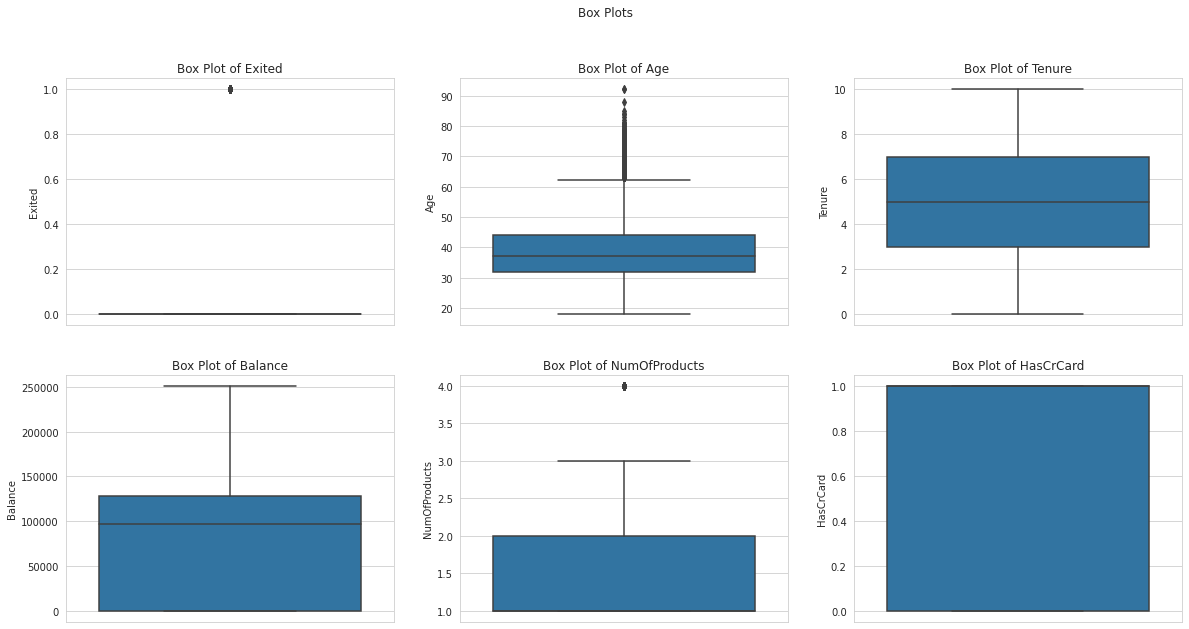

In [ ]:
# Checking for Outliers
# plotting boxplots to check outliers. 
#
fig, ax = plt.subplots(2,3, figsize=(20,10))
fig.suptitle('Box Plots')
sns.boxplot(data=df, y = "Exited", ax=ax[0,0])
ax[0,0].set_title('Box Plot of Exited')
sns.boxplot(data=df, y = "Age", ax=ax[0,1])
ax[0,1].set_title('Box Plot of Age')
sns.boxplot(data=df, y = "Tenure", ax=ax[0,2])
ax[0,2].set_title('Box Plot of Tenure')
sns.boxplot(data=df, y = "Balance", ax=ax[1,0])
ax[1,0].set_title('Box Plot of Balance')
sns.boxplot(data=df, y = "NumOfProducts", ax=ax[1,1])
ax[1,1].set_title('Box Plot of NumOfProducts')
sns.boxplot(data=df, y = "HasCrCard", ax=ax[1,2])
ax[1,2].set_title('Box Plot of HasCrCard')

plt.show()

In [ ]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## EDA

### Univariate

In [ ]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

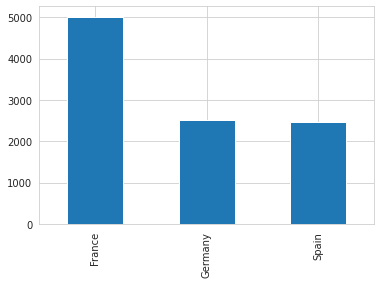

In [ ]:
# Plotting value counts of status
df['Geography'].value_counts().plot(kind='bar')

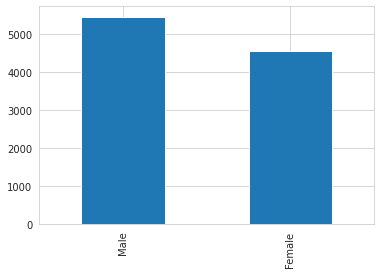

In [ ]:
# Plotting value counts of status
df['Gender'].value_counts().plot(kind='bar')

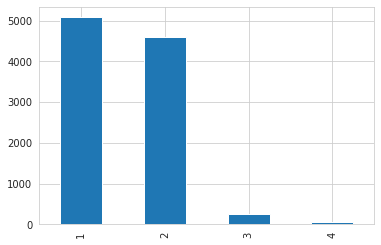

In [ ]:
# Plotting value counts of status
df['NumOfProducts'].value_counts().plot(kind='bar')

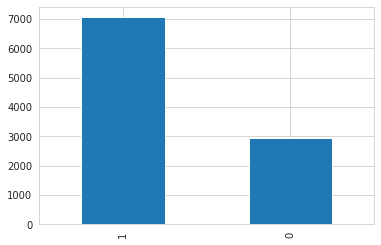

In [ ]:
# Plotting value counts of status
df['HasCrCard'].value_counts().plot(kind='bar')

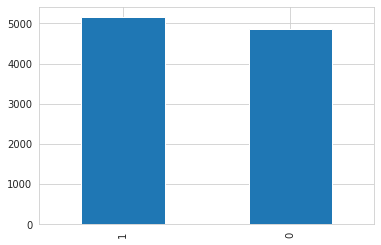

In [ ]:
# Plotting value counts of status
df['IsActiveMember'].value_counts().plot(kind='bar')

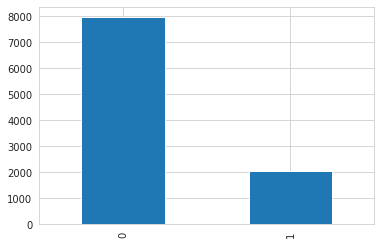

In [ ]:
# Plotting value counts of status
df['Exited'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


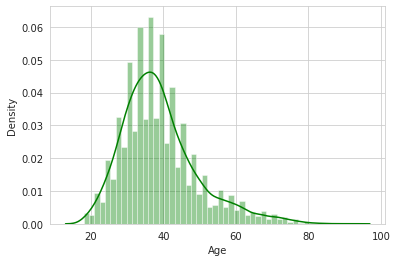

In [ ]:
# Plotting the Distplot
sns.distplot(df.Age, color="g")

### Bivariate

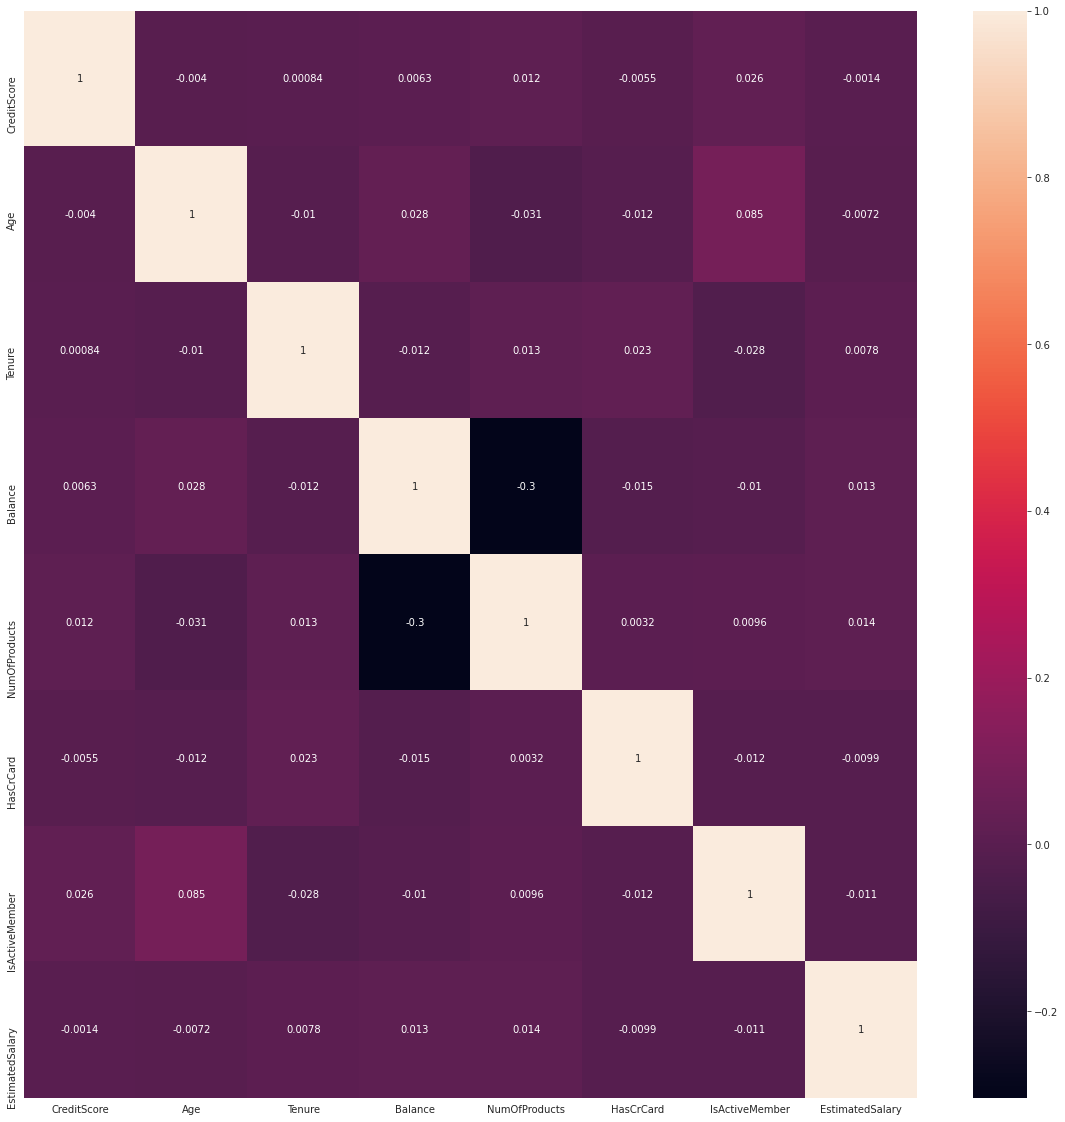

In [ ]:
# Getting the correlations of the dataset
ind = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

plt.subplots(figsize=(20,20))
sns.heatmap(ind.corr(),annot=True)

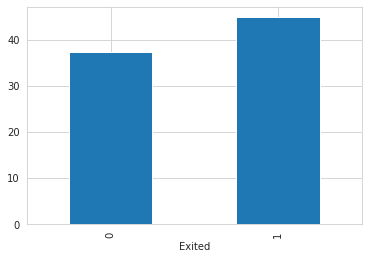

In [ ]:
# Plotting Survived against Mean of Age
ages = df.groupby(['Exited'])['Age'].mean()
ages.plot.bar()

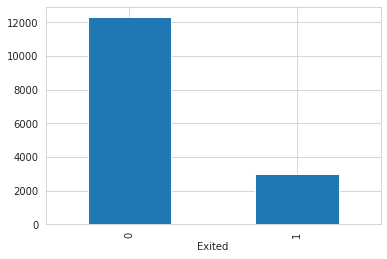

In [ ]:
# Plotting Survived against Mean of Age
products = df.groupby(['Exited'])['NumOfProducts'].sum()
products.plot.bar()

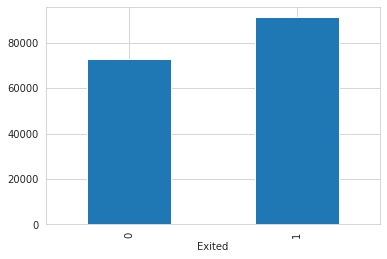

In [ ]:
# Plotting Survived against Mean of Age
bal = df.groupby(['Exited'])['Balance'].mean()
bal.plot.bar()

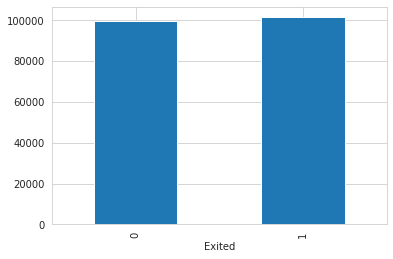

In [ ]:
# Plotting Survived against Mean of Age
estsal = df.groupby(['Exited'])['EstimatedSalary'].mean()
estsal.plot.bar()

In [ ]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

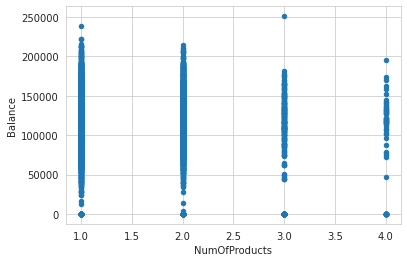

In [ ]:
# Creating a scatter plot between TT4 and T3
df.plot.scatter(x='NumOfProducts', y='Balance')

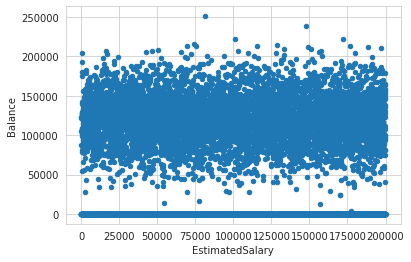

In [ ]:
# Creating a scatter plot between TT4 and T3
df.plot.scatter(x='EstimatedSalary', y='Balance')

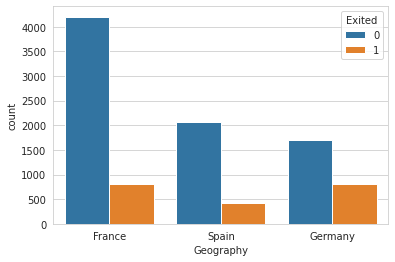

In [ ]:
sns.countplot(x=df.Geography,hue=df['Exited'])

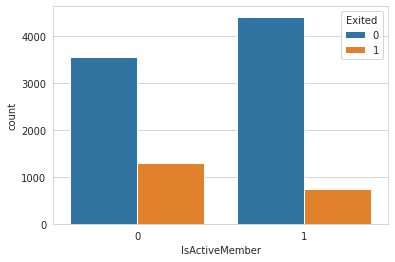

In [ ]:
# Plotting Survived against Mean of Age
sns.countplot(x=df.IsActiveMember,hue=df['Exited'])

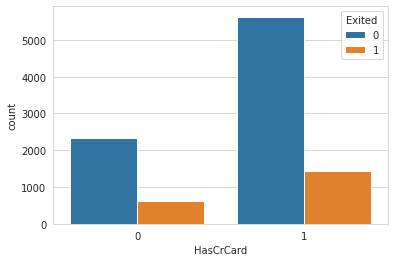

In [ ]:
# Plotting Survived against Mean of Age
sns.countplot(x=df.HasCrCard,hue=df['Exited'])

## SVC

In [ ]:
# Label Encoding Gender and Geography columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Data preprocessing
X = df.drop(['CustomerId','Exited'],axis=1)
y = df.Exited

In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Polynomial

In [ ]:
#List the Hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [1,0.1,0.01,0.001]}

#SVC Object
clf = GridSearchCV(SVC(), param_grid, cv=5)

#Fitting the Model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8585
[[1571   24]
 [ 259  146]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.86      0.36      0.51       405

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



### Linear

In [ ]:
# Building the model 
linclassifier = SVC(kernel='linear', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
linclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = linclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7975
[[1595    0]
 [ 405    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RBF

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.863
[[1560   35]
 [ 239  166]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.83      0.41      0.55       405

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



### RBF without optimization

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Data preprocessing
X = df.drop(['CustomerId','Exited'],axis=1)
y = df.Exited

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7975
[[1595    0]
 [ 405    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Net

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify = df['Exited'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#List the Hyperparameters
param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'], 'learning_rate' : ['constant', 'adaptive']}
mlp = MLPClassifier(max_iter=100)

#MLP Object
clf = GridSearchCV(mlp, param_grid, cv=10)

clf.fit(X, y)
#best params
clf.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:768: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/

{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'sgd'}

In [ ]:
# Making predictions
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:768: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


In [ ]:
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.7965
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

--------------------------------------------------------
Confusion Matrix:
[[1593    0]
 [ 407    0]]
--------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)


X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=df['Exited'])


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
# Making predictions
y_pred = clf.predict(X_test)

In [ ]:
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.7965
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

--------------------------------------------------------
Confusion Matrix:
[[1593    0]
 [ 407    0]]
--------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
